# Assignment 1:

Data Visualization with Haberman Dataset.

Plotting for Exploratory data analysis (EDA)

In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
#Importing pandas to load the dataset into pandas dataframe

import pandas as pd

haberman = pd.read_csv("Haberman/haberman.csv")

#list of columns of the dataset
haberman.columns

Index(['30', '64', '1', '1.1'], dtype='object')

In [13]:
#shape of the dataset
haberman.shape

(305, 4)

#Below are the features that are given in the dataset 

30 - Age (Age of patient at time of operation)

64 - Operation_Year (Year of operation)

1  - axil_nodes (Number of positive auxillary nodes detected)

1.1  - Surv_status (Survival status 1 = the patient survived 5 years or longer, 2 = the patient died within 5 year)


In [14]:
#since there are two classes which are 1 and 2 in the data set, checking the number of datapoints belonging to each class.
haberman["1.1"].value_counts()

1    224
2     81
Name: 1.1, dtype: int64

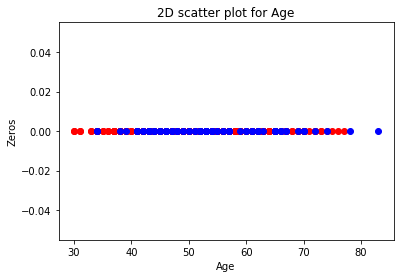

In [15]:
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sb

#2D scatter plot with x-axis as age for each class 1 and 2, y-axis as zeros.

class1= haberman.loc[haberman["1.1"]==1]
class2 = haberman.loc[haberman["1.1"]==2]
pt.plot(class1['30'],np.zeros_like(class1['30']),'ro')

pt.plot(class2['30'],np.zeros_like(class2['30']),'bo')


pt.ylabel("Zeros")
pt.xlabel("Age")
pt.title("2D scatter plot for Age")

pt.show()


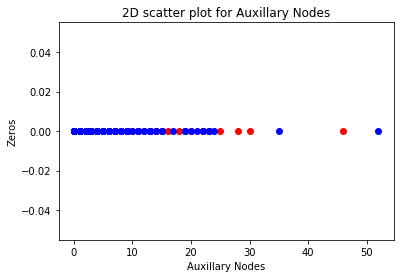

In [16]:
# similarly plotting for auxillary nodes feature

class1= haberman.loc[haberman["1.1"]==1]
class2 = haberman.loc[haberman["1.1"]==2]
pt.plot(class1['1'],np.zeros_like(class1['1']),'ro')

pt.plot(class2['1'],np.zeros_like(class2['1']),'bo')

pt.ylabel("Zeros")
pt.xlabel("Auxillary Nodes")
pt.title("2D scatter plot for Auxillary Nodes")

pt.show()

* If the number of positive auxillary nodes detected is greater than 25 its more likely to be of class 2(patient died within 5 year)

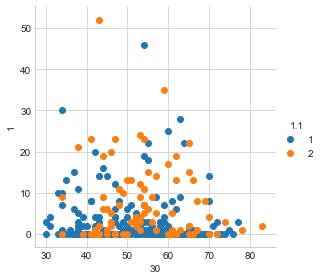

In [19]:
#Plotting as scatter plot b/w age and auxillary nodes

sb.set_style("whitegrid")

sb.FacetGrid(haberman,hue="1.1",size=4)  \
  .map(pt.scatter,"30","1").add_legend()

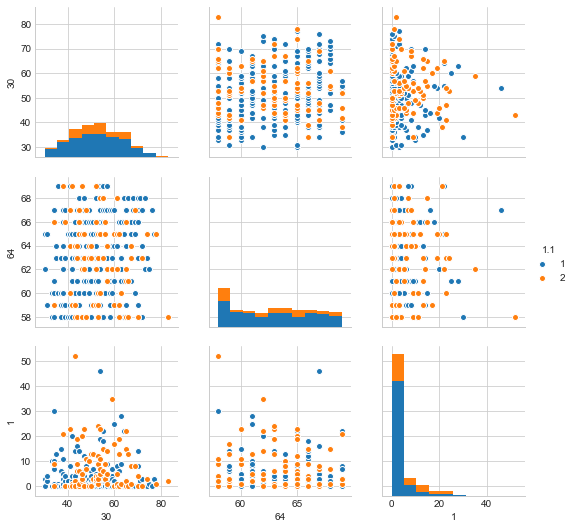

In [26]:
#Since the scatter plot b/w age and aux nodes has not given a clear idea. Tried with the below pair plot

pt.close()

sb.set_style("whitegrid")
#sb.pairplot(data=haberman,hue="1.1",size=3)
sb.pairplot(data=haberman,x_vars=["30","64","1"]
            ,y_vars=["30","64","1"],hue="1.1")

pt.show()

A lot of overlapping in almost all the plots.We cannot determine anything from them clearly.

In [27]:
#Plotting the histogram,PDF

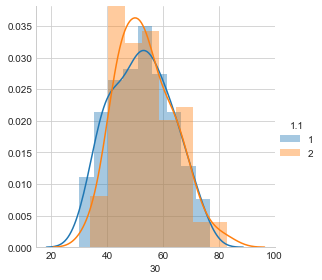

In [28]:
sb.FacetGrid(haberman,hue="1.1",size=4)  \
  .map(sb.distplot,"30").add_legend()

#Major overlapping

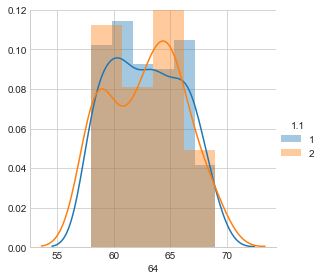

In [29]:
sb.FacetGrid(haberman,hue="1.1",size=4)  \
  .map(sb.distplot,"64").add_legend()

#Major Overlapping

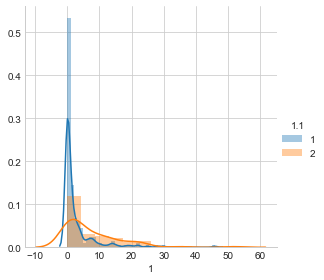

In [30]:
sb.FacetGrid(haberman,hue="1.1",size=4)  \
  .map(sb.distplot,"1").add_legend()

* Better compared to age and year of surgery.Plotting CDF and Box plot for auxilary nodes variant.

Class 1 Bin edges:
[ 0.    1.84  3.68  5.52  7.36  9.2  11.04 12.88 14.72 16.56 18.4  20.24
 22.08 23.92 25.76 27.6  29.44 31.28 33.12 34.96 36.8  38.64 40.48 42.32
 44.16 46.  ]
---------------------------------------------------------------------
Class 2 Bin edges:
[ 0.    2.08  4.16  6.24  8.32 10.4  12.48 14.56 16.64 18.72 20.8  22.88
 24.96 27.04 29.12 31.2  33.28 35.36 37.44 39.52 41.6  43.68 45.76 47.84
 49.92 52.  ]
---------------------------------------------------------------------


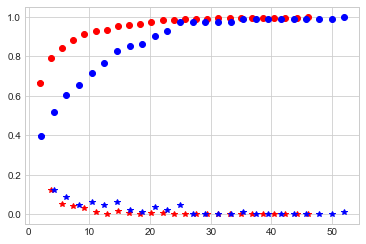

In [31]:
counts, bin_edges = np.histogram(class1["1"],bins=25,density=True)
print("Class 1 Bin edges:")
print(bin_edges)
print("---------------------------------------------------------------------")

pdf1= counts/sum(counts)
cdf1= np.cumsum(pdf1)

pt.plot(bin_edges[1:],pdf1,'r*')
pt.plot(bin_edges[1:],cdf1,'ro')

counts, bin_edges = np.histogram(class2["1"],bins=25,density=True)
print("Class 2 Bin edges:")
print(bin_edges)
print("---------------------------------------------------------------------")

pdf2= counts/sum(counts)
cdf2 = np.cumsum(pdf2)

pt.plot(bin_edges[1:],pdf2,'b*')
pt.plot(bin_edges[1:],cdf2,'bo')

pt.show()



* Number of positive auxillary nodes detected > 46 then class 2

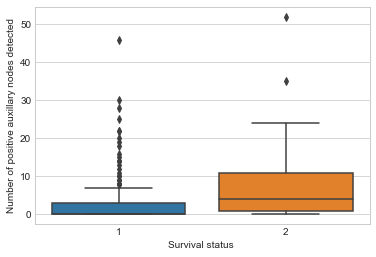

In [32]:
sb.boxplot(x='1.1',y='1',data= haberman)

pt.xlabel('Survival status ')
pt.ylabel('Number of positive auxillary nodes detected')
pt.show()

In [33]:
class1['1'].describe()

count    224.000000
mean       2.799107
std        5.882237
min        0.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       46.000000
Name: 1, dtype: float64

In [34]:
class2['1'].describe()

count    81.000000
mean      7.456790
std       9.185654
min       0.000000
25%       1.000000
50%       4.000000
75%      11.000000
max      52.000000
Name: 1, dtype: float64

In [35]:
print(np.percentile(class2['1'],40))


3.0


* 75% of patients who belongs to class1 has positive auxilary nodes less than or equals to 3.
* 50% of patients who belongs to class2 has positive auxilary nodes less than or equals to 4.

#Since 40 % of the patients in class2 has positive auxilary nodes less than or equals to 3.

If Auxilary nodes< =3:
    Patient belongs to class1

else:
    Patient belongs to class2

This will be 40% error.